## Problem 2.24

In [9]:
# Ahmed Hosny Abdelrazik - sec:1 - Bn:2
# TODO: Add your imports
import numpy as np
import matplotlib.pyplot as plt


### 2.24 (B)

In [10]:
def target_function(x):
    # TODO: implement target function
    return x*x

In [11]:
def run_numerical_experiment():
    # TODO: implement experiment
    x = np.linspace(-1, 1, 1000)
    y = target_function(x)
    plt.plot(x, y,color='blue')
    np.random.seed(1975)
    a_hat = np.array([])
    b_hat = np.array([])
    for i in range(1,50001):
        rand = np.random.uniform(-1, 1, 2)
        data = np.array([rand, target_function(rand)])
        a = (data[1][0] - data[1][1]) / (data[0][0] - data[0][1])
        a_hat = np.append(a_hat, a)
        b = (data[1][1] * data[0][0] - data[1][0] * data[0][1]) / (data[0][0] - data[0][1])
        b_hat = np.append(b_hat, b)
        if i % 1000 == 0:
            plt.plot(x, a*x+b, color='green')
    a_bar = np.mean(a_hat)
    b_bar = np.mean(b_hat)
    x_new = np.random.uniform(-1, 1, 100000)
    Eout = np.mean(x_new**4) - 2 * a_hat * np.mean(x_new**3) + (a_hat**2 - 2 * b_hat) * np.mean(x_new**2) + 2 * a_hat * b_hat * np.mean(x_new) + b_hat**2 
    Exp_Eout = np.round(np.mean(Eout), 2)
    bias_x = (a_bar * x_new - b_bar - target_function(x_new))**2
    bias = np.round(np.mean(bias_x), 2)
    var_x = np.mean((a_hat - a_bar)**2) * x_new**2 + 2 * np.mean((a_hat - a_bar) * (b_hat - b_bar)) * x_new + np.mean((b_hat - b_bar)**2)
    var = np.round(np.mean(var_x), 2)
    print('Exp_Eout:', Exp_Eout)
    print('bias:', bias)
    print('var:', var)
    plt.show()

    

### 2.24 (C)

Exp_Eout: 0.53
bias: 0.2
var: 0.33


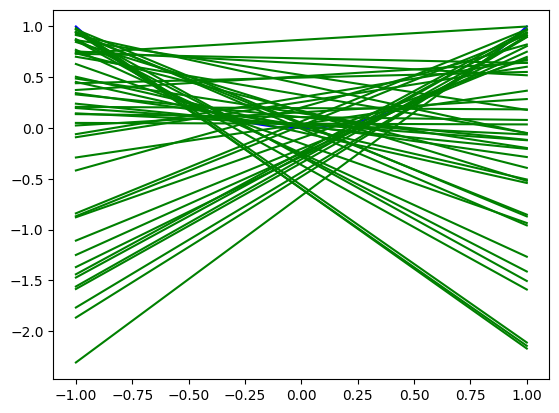

'\nWhen we run the experiment above, we get Eout = 0.53, bias = 0.2, and variance = 0.33 We may\nimmediately see that Eout is the sum of bias and variance\n'

In [12]:
# TODO: Run experiment and calculate bias and variance (+ plotting)
run_numerical_experiment()
'''
When we run the experiment above, we get Eout = 0.53, bias = 0.2, and variance = 0.33 We may
immediately see that Eout is the sum of bias and variance
'''


### 2.24 (E)

Num points: 2
Eout: 0.09196941343903232
bias: 0.09196941343903232
var: 0.07033572078806247
Eout = bias + var: False


C:\Users\engah\AppData\Local\Temp\ipykernel_28948\2887901855.py:13: RankWarning: Polyfit may be poorly conditioned
  coefficients = np.polyfit(data_points, target_values, 2)


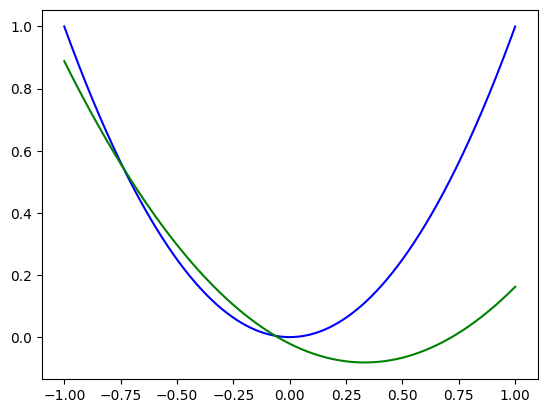

Num points: 5
Eout: 8.625557038563667e-33
bias: 8.625557038563667e-33
var: 0.08877141971554145
Eout = bias + var: False


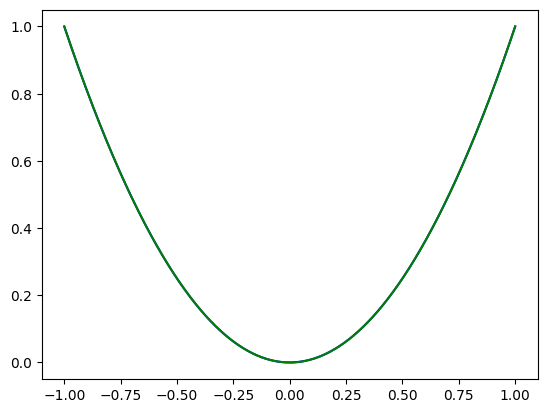

Num points: 10
Eout: 3.785550133595198e-32
bias: 3.785550133595198e-32
var: 0.08877269701853314
Eout = bias + var: False


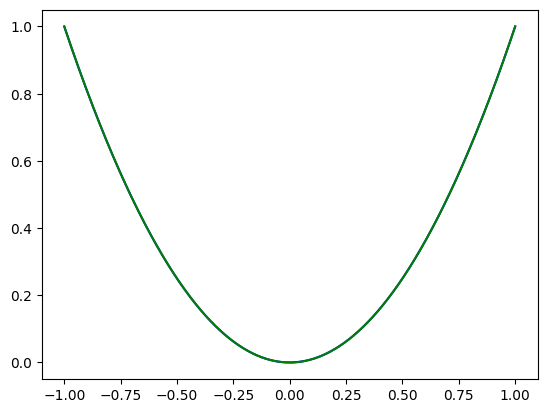

Num points: 20
Eout: 2.031321835668717e-32
bias: 2.031321835668717e-32
var: 0.08877898997578175
Eout = bias + var: False


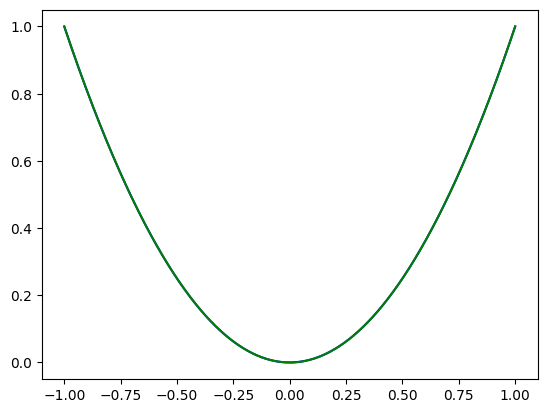

Num points: 1000
Eout: 7.713184162643232e-32
bias: 7.713184162643232e-32
var: 0.08882729031590479
Eout = bias + var: False


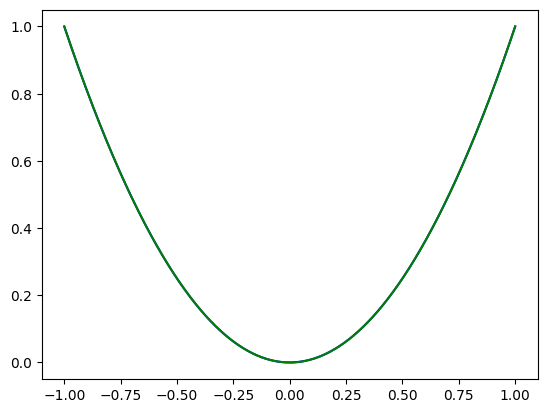

In [13]:
# TODO: Run experiment for quadratic hypothesis

def run_numerical_experiment(num_points):
    x = np.linspace(-1, 1, 1000)
    y = target_function(x)
    plt.plot(x, y, color='blue')

    np.random.seed(1975)
    data_points = np.random.uniform(-1, 1, num_points)
    target_values = target_function(data_points)

    # Fit a quadratic function to the data points
    coefficients = np.polyfit(data_points, target_values, 2)
    h_values = np.polyval(coefficients, x)
    plt.plot(x, h_values, color='green')

    x_new = np.random.uniform(-1, 1, 100000)
    y_new = target_function(x_new)
    h_new = np.polyval(coefficients, x_new)

    Eout = np.mean((y_new - h_new)**2)
    bias = np.mean((y_new - np.polyval(coefficients, x_new))**2)
    var = np.mean((h_new - np.mean(h_new))**2)

    print('Num points:', num_points)
    print('Eout:', Eout)
    print('bias:', bias)
    print('var:', var)
    print('Eout = bias + var:', np.isclose(Eout, bias + var))

    plt.show()

# Run the experiment for different numbers of data points
for num_points in [2, 5, 10, 20,1000]:
    run_numerical_experiment(num_points)

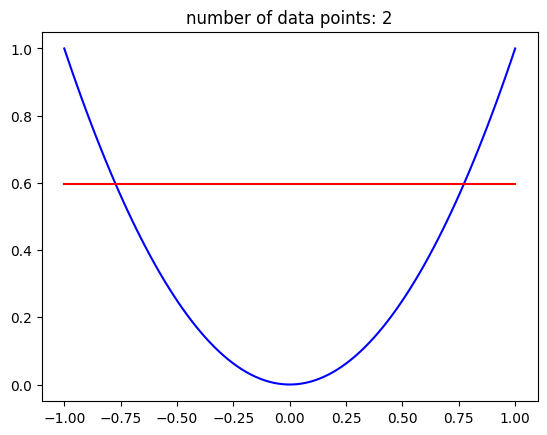

out of sample error: 0.0640861544119619
bias: -0.23436204245535272
variance: 0.0


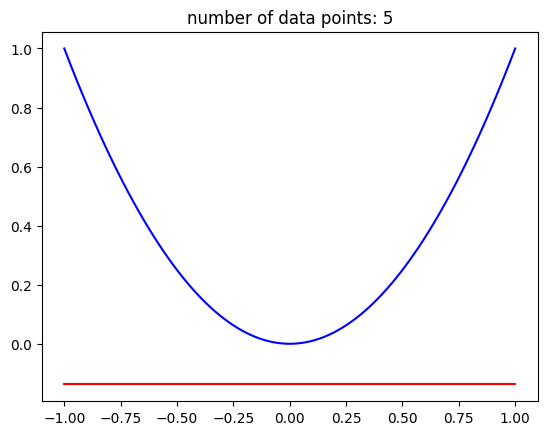

out of sample error: 0.7211585245404677
bias: 0.8097043183335113
variance: 0.0


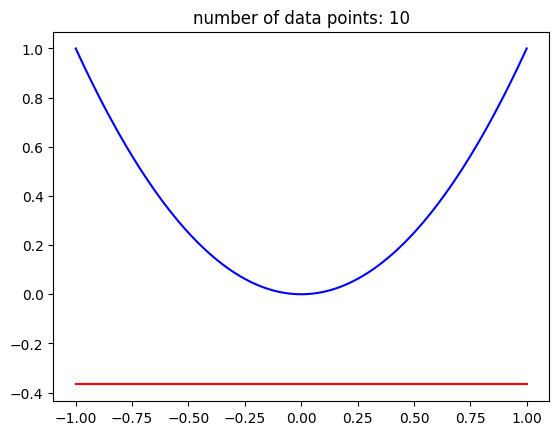

out of sample error: 0.552521318218836
bias: 0.7007763679839113
variance: 0.0


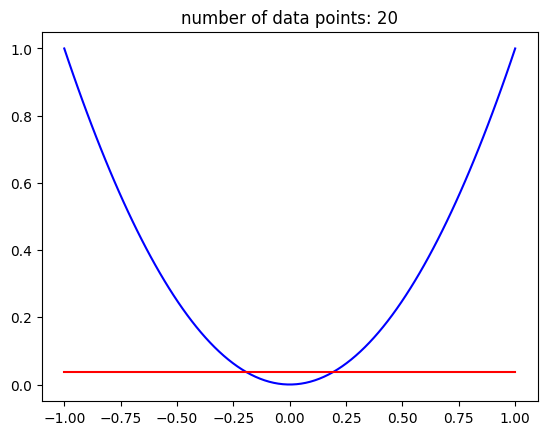

out of sample error: 0.1859149749697768
bias: 0.27429809211840933
variance: 0.0


'\n- e_out aproximately equals to bias + variance\n- The variance is always zero in this case because the hypothesis function is a constant function. \n  In other words, the output of the hypothesis function h(x) = c does not change with different inputs x, \n  it always equals to the constant c\n'

In [15]:
# TODO: Run experiment for constant hypothesis

def run_numerical_experiment_constant_hypothesis(num_points):
    x = np.random.uniform(-1, 1, num_points)
    y_true = target_function(x)
    
    # Training data set
    constant = np.mean(x)
    g = lambda x: constant
    y_pred = g(x)
    mse = np.mean((y_true - y_pred)**2)
    b = np.mean(y_true - y_pred)
    var = np.var(y_pred)
    
    x_range = np.linspace(-1, 1, 100)
    y_pred = g(x)
    plt.plot(x_range, target_function(x_range), label='Target function: $f(x) = x^2$', color='blue')
    plt.plot(x_range, y_pred * np.ones_like(x_range), label='Predicted function: $\hat{g}(x)$', color='red')
    plt.title('number of data points: ' + str(num_points))
    plt.show()
    print(f"out of sample error: {mse}")
    print(f"bias: {b}")
    print(f"variance: {var}")

# Run the experiment for different numbers of data points
for num_points in [2, 5, 10, 20]:
    run_numerical_experiment_constant_hypothesis(num_points)


"""
- e_out aproximately equals to bias + variance
- The variance is always zero in this case because the hypothesis function is a constant function. 
  In other words, the output of the hypothesis function h(x) = c does not change with different inputs x, 
  it always equals to the constant c
"""